# Recolección de datos electorales en Ecuador año 2017

Empezamos recolectando la información de las elecciones correspondientes al año 2017 de la página oficial del [CNE](http://cne.gob.ec/es/estadisticas/bases-de-datos)

Nos dirigimos a la carpeta de elecciones generales del año 2006, y recopilamos la información necesaria. Una vez descargados los archivos y exportados en formato csv, procedemos a subirlos a nuestro notebook.

## Descargando las bibliotecas necesarias para trabajar y limpiando las tablas

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mp 
import matplotlib.pyplot as plt

In [3]:
os.chdir(r"C:\Users\HP\Documents\GitHub\Proyecto_Datos_Elecciones_Ecuador_2002_2017\2017\2da vuelta")
df_p2017=pd.read_csv('p2013.csv')
df_p2017.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,PARROQUIA_ESTADO
0,7,EL ORO,360,ZARUMA,5,ABANIN,RURAL
1,13,MANABI,440,PORTOVIEJO,10,ABDON CALDERON,RURAL
2,1,AZUAY,285,SANTA ISABEL,15,ABDON CALDERON / LA UNION,RURAL
3,6,CHIMBORAZO,215,ALAUSI,20,ACHUPALLAS,RURAL
4,15,NAPO,620,TENA,25,AHUANO,RURAL


In [4]:
df_c2017=pd.read_csv('c2017.csv')
df_c2017.head()

,DIGNIDAD_CODIGO,DIGNIDAD_NOMBRE,OP_CODIGO,NUM_PARTIDO,CANDIDATO_CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE,CANDIDATO_SEXO,CANDIDATO_GRUPO_EDAD,CANDIDATO_TERRITORIO_CODIGO,...,CANDIDATO_PROVINCIA_NOMBRE,CANDIDATO_CIRCUNSCRIPCION_CODIGO_ORIGINAL,CANDIDATO_CIRCUNSCRIPCION_CODIGO,CANDIDATO_CIRCUNSCRIPCION_NOMBRE,SUPLENTE1_NOMBRE,SUPLENTE1_SEXO,SUPLENTE1_GRUPO_EDAD,SUPLENTE2_NOMBRE,SUPLENTE2_SEXO,SUPLENTE2_GRUPO_EDAD
0,9,9,700,8,1239,7,BERMEO ALVEAR MARCO VINICIO,1,6,1,...,0,0,0,0,REYES GARLING BARBARA ELEEN,2,3,NaN,,
1,7,7,720,1,201,1,LARRIVA ALVARADO OSCAR OSWALDO,1,6,1,...,1,0,10,10,CABRERA FAJARDO ELSA PIEDAD,2,3,NaN,,
2,9,9,620,3,1794,11,MALDONADO AGUIRRE SEGUNDO CESAR,1,6,1,...,0,0,0,0,REA ELIZALDE THALIA VANESSA,2,1,NaN,,
3,7,7,721,10,1405,1,HEREDIA TAPIA ALFONSO,1,6,1,...,1,0,10,10,FLORES SARMIENTO MARIA BELEN,2,1,NaN,,
4,7,7,721,10,1417,4,ORTEGA CAMPOVERDE CONSEPCION AIDA,2,6,1,...,1,0,10,10,GARCIA JARAMILLO WILSON NOLBERTO,1,4,NaN,,


In [5]:
df_2V2017=pd.read_csv('2V2017.csv')
df_2V2017.head()

,DIGNIDAD_CODIGO,DIGNIDAD_NOMBRE,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CIRCUNSCRIPCION_CODIGO_ORIGINAL,CIRCUNSCRIPCION_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,JUNTA_SEXO,CANDIDATO_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,ELECTORES_REGISTRO,ELECTORES_RESULTADOS,SUFRAGANTES,CANDIDATO_VOTOS
0,1,1,1,1,0,10,260,260,285,285,F,16,82,625,11612,11612,9384,3654
1,1,1,1,1,0,10,260,260,285,285,F,502,82,625,11612,11612,9384,5023
2,1,1,1,1,0,10,260,260,285,285,M,16,49,491,11210,11212,8121,3636
3,1,1,1,1,0,10,260,260,285,285,M,502,49,491,11210,11212,8121,3944
4,1,1,1,1,0,10,260,260,730,730,F,16,22,177,3230,3230,2591,1225


Antes de nada, procedemos a limpiar la tabla de candidatos. Analizamos sus columnas primero.

In [6]:
df_c2017.dtypes

DIGNIDAD_CODIGO                               int64
DIGNIDAD_NOMBRE                               int64
OP_CODIGO                                     int64
NUM_PARTIDO                                   int64
CANDIDATO_CODIGO                              int64
CANDIDATO_ORDEN_LISTA                         int64
CANDIDATO_NOMBRE                             object
CANDIDATO_SEXO                                int64
CANDIDATO_GRUPO_EDAD                          int64
CANDIDATO_TERRITORIO_CODIGO                   int64
CANDIDATO_TERRITORIO_NOMBRE                   int64
CANDIDATO_PROVINCIA_CODIGO                    int64
CANDIDATO_PROVINCIA_NOMBRE                    int64
CANDIDATO_CIRCUNSCRIPCION_CODIGO_ORIGINAL     int64
CANDIDATO_CIRCUNSCRIPCION_CODIGO              int64
CANDIDATO_CIRCUNSCRIPCION_NOMBRE              int64
SUPLENTE1_NOMBRE                             object
SUPLENTE1_SEXO                                int64
SUPLENTE1_GRUPO_EDAD                          int64
SUPLENTE2_NO

In [9]:
df_c2017=df_c2017.drop(['CANDIDATO_CIRCUNSCRIPCION_CODIGO','DIGNIDAD_CODIGO','CANDIDATO_CIRCUNSCRIPCION_CODIGO_ORIGINAL','CANDIDATO_PROVINCIA_CODIGO','CANDIDATO_TERRITORIO_CODIGO','CANDIDATO_TERRITORIO_NOMBRE'], axis=1)
df_c2017=df_c2017.drop(['CANDIDATO_CIRCUNSCRIPCION_NOMBRE','CANDIDATO_SEXO','CANDIDATO_GRUPO_EDAD','SUPLENTE1_NOMBRE','SUPLENTE1_SEXO','SUPLENTE1_GRUPO_EDAD'], axis=1)
df_c2017=df_c2017.drop(['SUPLENTE2_NOMBRE','SUPLENTE2_SEXO','SUPLENTE2_GRUPO_EDAD'], axis=1)
df_c2017.head()

,DIGNIDAD_NOMBRE,OP_CODIGO,NUM_PARTIDO,CANDIDATO_CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE,CANDIDATO_PROVINCIA_NOMBRE
0,9,700,8,1239,7,BERMEO ALVEAR MARCO VINICIO,0
1,7,720,1,201,1,LARRIVA ALVARADO OSCAR OSWALDO,1
2,9,620,3,1794,11,MALDONADO AGUIRRE SEGUNDO CESAR,0
3,7,721,10,1405,1,HEREDIA TAPIA ALFONSO,1
4,7,721,10,1417,4,ORTEGA CAMPOVERDE CONSEPCION AIDA,1


In [10]:
df_c2017.dtypes

DIGNIDAD_NOMBRE                int64
OP_CODIGO                      int64
NUM_PARTIDO                    int64
CANDIDATO_CODIGO               int64
CANDIDATO_ORDEN_LISTA          int64
CANDIDATO_NOMBRE              object
CANDIDATO_PROVINCIA_NOMBRE     int64
dtype: object

In [15]:
df_c2017=df_c2017.drop(['CANDIDATO_PROVINCIA_NOMBRE'], axis=1)
df_c2017.head()

,DIGNIDAD_NOMBRE,OP_CODIGO,NUM_PARTIDO,CANDIDATO_CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE
0,9,700,8,1239,7,BERMEO ALVEAR MARCO VINICIO
1,7,720,1,201,1,LARRIVA ALVARADO OSCAR OSWALDO
2,9,620,3,1794,11,MALDONADO AGUIRRE SEGUNDO CESAR
3,7,721,10,1405,1,HEREDIA TAPIA ALFONSO
4,7,721,10,1417,4,ORTEGA CAMPOVERDE CONSEPCION AIDA


De la tabla de resultados, también eliminamos las columnas sin importancia.

In [18]:
df_2V2017.dtypes

DIGNIDAD_CODIGO                     int64
DIGNIDAD_NOMBRE                     int64
PROVINCIA_CODIGO                    int64
PROVINCIA_NOMBRE                    int64
CIRCUNSCRIPCION_CODIGO_ORIGINAL     int64
CIRCUNSCRIPCION_NOMBRE              int64
CANTON_CODIGO                       int64
CANTON_NOMBRE                       int64
PARROQUIA_CODIGO                    int64
PARROQUIA_NOMBRE                    int64
JUNTA_SEXO                         object
CANDIDATO_CODIGO                    int64
VOTOS_EN_BLANCO                     int64
VOTOS_NULOS                         int64
ELECTORES_REGISTRO                  int64
ELECTORES_RESULTADOS                int64
SUFRAGANTES                         int64
CANDIDATO_VOTOS                     int64
dtype: object

In [19]:
df_2V2017=df_2V2017.drop(['DIGNIDAD_CODIGO','DIGNIDAD_NOMBRE','CIRCUNSCRIPCION_CODIGO_ORIGINAL','CIRCUNSCRIPCION_NOMBRE','JUNTA_SEXO'], axis=1)
df_2V2017=df_2V2017.drop(['ELECTORES_REGISTRO','ELECTORES_RESULTADOS','SUFRAGANTES'], axis=1)
df_2V2017.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,CANDIDATO_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
0,1,1,260,260,285,285,16,82,625,3654
1,1,1,260,260,285,285,502,82,625,5023
2,1,1,260,260,285,285,16,49,491,3636
3,1,1,260,260,285,285,502,49,491,3944
4,1,1,260,260,730,730,16,22,177,1225


Una vez reducidas la cantidad de columnas, verificamos la probabilidad de datos duplicados en nuestra tabla.

In [20]:
df_2V2017.count()

PROVINCIA_CODIGO    5226
PROVINCIA_NOMBRE    5226
CANTON_CODIGO       5226
CANTON_NOMBRE       5226
PARROQUIA_CODIGO    5226
PARROQUIA_NOMBRE    5226
CANDIDATO_CODIGO    5226
VOTOS_EN_BLANCO     5226
VOTOS_NULOS         5226
CANDIDATO_VOTOS     5226
dtype: int64

Por lo visto no existen filas duplicadas, por lo que continuamos con nuestra depuración. Una vez eliminadas las filas duplicadas, revisamos si existan filas que posean datos nulos. Utilizamos el siguiente código.

In [21]:
print(df_2V2017.isnull().sum())

PROVINCIA_CODIGO    0
PROVINCIA_NOMBRE    0
CANTON_CODIGO       0
CANTON_NOMBRE       0
PARROQUIA_CODIGO    0
PARROQUIA_NOMBRE    0
CANDIDATO_CODIGO    0
VOTOS_EN_BLANCO     0
VOTOS_NULOS         0
CANDIDATO_VOTOS     0
dtype: int64


Por lo visto no existen datos nulos, por lo que continuamos con el arreglo de nuestras tablas de información.

## Agrupación de datos por candidato

Antes de contar votos por candidato, procedemos a unir las tablas necesarias. Para eliminar inconsistencias de la columna de candidatos, cambiamos el nombre de la columna codigo candidato. Comenzamos uniendo las tablas correspondientes

In [22]:
df_c2017.rename(columns={'CANDIDATO_CODIGO':'CODIGO'}, inplace=True)
df_c2017.head()

,DIGNIDAD_NOMBRE,OP_CODIGO,NUM_PARTIDO,CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE
0,9,700,8,1239,7,BERMEO ALVEAR MARCO VINICIO
1,7,720,1,201,1,LARRIVA ALVARADO OSCAR OSWALDO
2,9,620,3,1794,11,MALDONADO AGUIRRE SEGUNDO CESAR
3,7,721,10,1405,1,HEREDIA TAPIA ALFONSO
4,7,721,10,1417,4,ORTEGA CAMPOVERDE CONSEPCION AIDA


Ordenamos nuestra tabla por codigo

In [24]:
df_c2017.sort_values(['CODIGO'], ascending=True, inplace=True)
df_c2017.head(15)

,DIGNIDAD_NOMBRE,OP_CODIGO,NUM_PARTIDO,CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE
598,7,624,67,10,1,BORBOR MITE VICENTE PAUL
538,7,624,67,11,2,PALMA GONZALEZ GLENDA VICTORIA
743,7,624,67,12,3,TOMALA FLORES GABRIEL ERNESTO
173,7,2,21023,13,1,MARTINEZ PEREZ YACO MARLON
182,7,2,21023,14,2,ROSERO REINA WENDY NATHALY
163,7,2,21023,15,3,MONTENEGRO MELO AMILCAR LEANDRO
477,1,2,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
1200,9,2,21023,17,1,CELI SANTOS GUILLERMO ALEJANDRO
388,9,2,21023,18,2,MONTAÑO VALENCIA MAE
166,9,2,21023,19,3,BURBANO MONTENEGRO FELIX FERNANDO


In [25]:
df_rp=pd.merge(left=df_2V2017, right=df_c2017, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_rp

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,CANDIDATO_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS,DIGNIDAD_NOMBRE,OP_CODIGO,NUM_PARTIDO,CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE
0,1,1,260,260,285,285,16,82,625,3654,1,2,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
1,1,1,260,260,285,285,502,82,625,5023,1,589,35,502,1,MORENO GARCES LENIN BOLTAIRE
2,1,1,260,260,285,285,16,49,491,3636,1,2,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
3,1,1,260,260,285,285,502,49,491,3944,1,589,35,502,1,MORENO GARCES LENIN BOLTAIRE
4,1,1,260,260,730,730,16,22,177,1225,1,2,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221,28,28,401,401,9085,9085,502,0,5,113,1,589,35,502,1,MORENO GARCES LENIN BOLTAIRE
5222,28,28,441,441,9077,9077,16,0,0,7,1,2,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
5223,28,28,441,441,9077,9077,502,0,0,1,1,589,35,502,1,MORENO GARCES LENIN BOLTAIRE
5224,28,28,441,441,9077,9077,16,0,0,4,1,2,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO


La tabla se ve mucho mejor, por lo que ahora agrupamos los votos por candidato.

In [26]:
df_rp=df_rp.groupby('CANDIDATO_NOMBRE')['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_rp

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,69436,670731,4833389
MORENO GARCES LENIN BOLTAIRE,69436,670731,5062018


Realizamos un gráfico de pastel para poder visibilizar mejor la información.

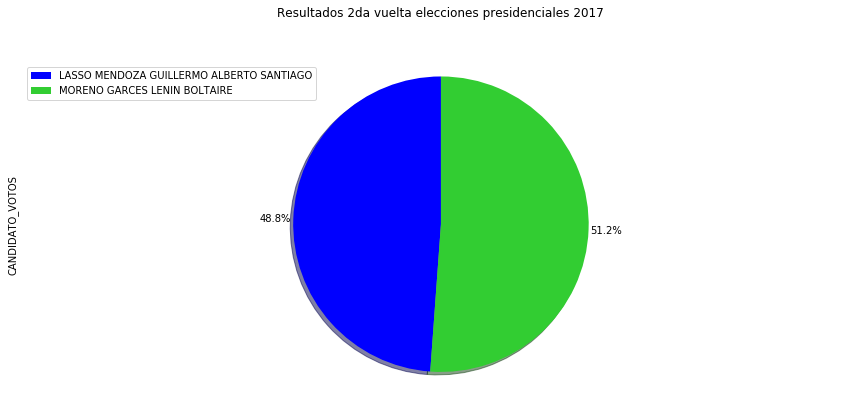

In [28]:
Colores= ['blue','limegreen']

df_rp['CANDIDATO_VOTOS'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            colors=Colores,
                            pctdistance=1.12,
                            )

# Título del gráfico
plt.title('Resultados 2da vuelta elecciones presidenciales 2017', y=1.12) 

plt.axis('equal') 

# Añadir leyenda
plt.legend(labels=df_rp.index, loc='upper left') 

plt.show()

## Agrupación de datos por provincia

Procedemos nuevamente a unir las tablas correspondientes para poder aislar los datos que necesitamos.

In [29]:
df_p=pd.merge(left=df_2V2017, right=df_c2017, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_p

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,CANDIDATO_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS,DIGNIDAD_NOMBRE,OP_CODIGO,NUM_PARTIDO,CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE
0,1,1,260,260,285,285,16,82,625,3654,1,2,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
1,1,1,260,260,285,285,502,82,625,5023,1,589,35,502,1,MORENO GARCES LENIN BOLTAIRE
2,1,1,260,260,285,285,16,49,491,3636,1,2,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
3,1,1,260,260,285,285,502,49,491,3944,1,589,35,502,1,MORENO GARCES LENIN BOLTAIRE
4,1,1,260,260,730,730,16,22,177,1225,1,2,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221,28,28,401,401,9085,9085,502,0,5,113,1,589,35,502,1,MORENO GARCES LENIN BOLTAIRE
5222,28,28,441,441,9077,9077,16,0,0,7,1,2,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO
5223,28,28,441,441,9077,9077,502,0,0,1,1,589,35,502,1,MORENO GARCES LENIN BOLTAIRE
5224,28,28,441,441,9077,9077,16,0,0,4,1,2,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO


In [31]:
df_p=pd.merge(left=df_p, right=df_p2017, how='left', left_on='PROVINCIA_CODIGO', right_on='PROVINCIA_CODIGO')
df_p.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE_x,CANTON_CODIGO_x,CANTON_NOMBRE_x,PARROQUIA_CODIGO_x,PARROQUIA_NOMBRE_x,CANDIDATO_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS,...,NUM_PARTIDO,CODIGO,CANDIDATO_ORDEN_LISTA,CANDIDATO_NOMBRE,PROVINCIA_NOMBRE_y,CANTON_CODIGO_y,CANTON_NOMBRE_y,PARROQUIA_CODIGO_y,PARROQUIA_NOMBRE_y,PARROQUIA_ESTADO
0,1,1,260,260,285,285,16,82,625,3654,...,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,AZUAY,285,SANTA ISABEL,15,ABDON CALDERON / LA UNION,RURAL
1,1,1,260,260,285,285,16,82,625,3654,...,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,AZUAY,955,SEVILLA DE ORO,85,AMALUZA,RURAL
2,1,1,260,260,285,285,16,82,625,3654,...,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,AZUAY,270,GIRON,175,ASUNCION,RURAL
3,1,1,260,260,285,285,16,82,625,3654,...,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,AZUAY,260,CUENCA,285,BAÑOS,RURAL
4,1,1,260,260,285,285,16,82,625,3654,...,21023,16,1,LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,AZUAY,275,PAUTE,395,BULAN / J. VICTOR IZQUIERDO,RURAL


In [33]:
df_prov=df_p.groupby(['PROVINCIA_NOMBRE_y','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_prov

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
PROVINCIA_NOMBRE_y                CANDIDATO_NOMBRE                                            
AMERICA LATINA EL CARIBE Y AFRICA LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             1485   
                                  MORENO GARCES LENIN BOLTAIRE                         1485   
AZUAY                             LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           285840   
                                  MORENO GARCES LENIN BOLTAIRE                       285840   
BOLIVAR                           LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            29870   
                                  MORENO GARCES LENIN BOLTAIRE                        29870   
CARCHI                            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            21456   
                                  MORENO GARCES LENIN BOLTAIRE                        21456   
CAÑAR                             LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            41832   
                                  MORENO GARCES LENIN BOLTAIRE                        41832   
CHIMBORAZO                        LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           130174   
                                  MORENO GARCES LENIN BOLTAIRE                       130174   
COTOPAXI                          LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            81006   
                                  MORENO GARCES LENIN BOLTAIRE                        81006   
EE.UU CANADA                      LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             2656   
                                  MORENO GARCES LENIN BOLTAIRE                         2656   
EL ORO                            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           196560   
                                  MORENO GARCES LENIN BOLTAIRE                       196560   
ESMERALDAS                        LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           224568   
                                  MORENO GARCES LENIN BOLTAIRE                       224568   
EUROPA ASIA Y OCEANIA             LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            44270   
                                  MORENO GARCES LENIN BOLTAIRE                        44270   
GALAPAGOS                         LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO              472   
                                  MORENO GARCES LENIN BOLTAIRE                          472   
GUAYAS                            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO          1524462   
                                  MORENO GARCES LENIN BOLTAIRE                      1524462   
IMBABURA                          LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            92667   
                                  MORENO GARCES LENIN BOLTAIRE                        92667   
LOJA                              LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           167892   
                                  MORENO GARCES LENIN BOLTAIRE                       167892   
LOS RIOS                          LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           259336   
                                  MORENO GARCES LENIN BOLTAIRE                       259336   
MANABI                            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           976505   
                                  MORENO GARCES LENIN BOLTAIRE                       976505   
MORONA SANTIAGO                   LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            31093   
                                  MORENO GARCES LENIN BOLTAIRE                        31093   
NAPO                              LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             5625   
                                  MORENO GARCES LENIN BOLTAIRE                         5625   
ORELLANA                          LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            16320   
                                  MORENO GARCES LENIN BOLTAIRE                        16320   
PASTAZA                           LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            

Para poder visualizar mejor la información, procedemos a realizar un gráfico de barras con la tabla obtenida

In [34]:
df_prov1=df_prov['CANDIDATO_VOTOS']
df_prov1=df_prov1.unstack(level=[1])

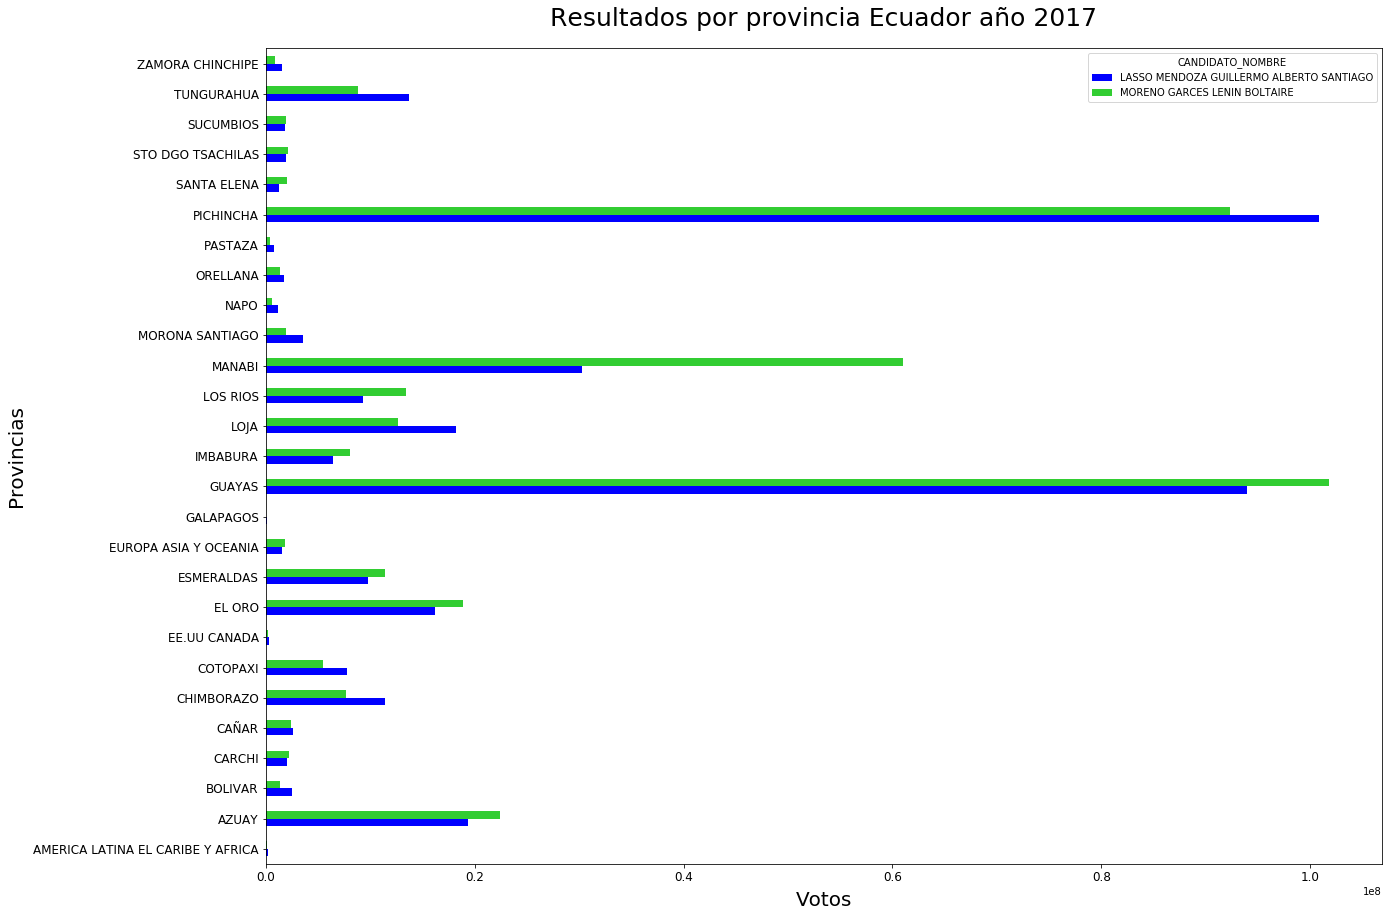

In [35]:
df_prov1.plot(kind='barh', figsize=(20,15), label=None, color=Colores)

plt.xlabel('Votos', fontsize=20, labelpad= 7)
plt.ylabel('Provincias', fontsize=20, labelpad= 7)
plt.title('Resultados por provincia Ecuador año 2017', fontsize=25, y=1.02)
plt.tick_params(labelsize=12)

plt.show()

## Agrupando los votos por canton

Nuevamente nos centramos en reunir la información en una sola tabla, esta vez voy a organizar los votos por cantón. Vamos a utilizar la misma tabla unificada, pero esta vez vamos a agrupar la información por cantón y nombre de candidato.

In [36]:
df_cant=df_p.groupby(['CANTON_NOMBRE_y','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_cant.head(20)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
CANTON_NOMBRE_y    CANDIDATO_NOMBRE                                            
24 DE MAYO         LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            41116   
                   MORENO GARCES LENIN BOLTAIRE                        41116   
A.BAQUERIZO MORENO LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            18591   
                   MORENO GARCES LENIN BOLTAIRE                        18591   
AGUARICO           LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             2880   
                   MORENO GARCES LENIN BOLTAIRE                         2880   
ALAUSI             LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            21340   
                   MORENO GARCES LENIN BOLTAIRE                        21340   
ALEMANIA           LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             2330   
                   MORENO GARCES LENIN BOLTAIRE                         2330   
AMBATO             LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            44847   
                   MORENO GARCES LENIN BOLTAIRE                        44847   
ANTONIO ANTE       LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            10902   
                   MORENO GARCES LENIN BOLTAIRE                        10902   
ARAJUNO            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO              448   
                   MORENO GARCES LENIN BOLTAIRE                          448   
ARCHIDONA          LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO              900   
                   MORENO GARCES LENIN BOLTAIRE                          900   
ARENILLAS          LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             9360   
                   MORENO GARCES LENIN BOLTAIRE                         9360   

                                                             VOTOS_NULOS  \
CANTON_NOMBRE_y    CANDIDATO_NOMBRE                                        
24 DE MAYO         LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO       292568   
                   MORENO GARCES LENIN BOLTAIRE                   292568   
A.BAQUERIZO MORENO LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO       168447   
                   MORENO GARCES LENIN BOLTAIRE                   168447   
AGUARICO           LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        32334   
                   MORENO GARCES LENIN BOLTAIRE                    32334   
ALAUSI             LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO       255500   
                   MORENO GARCES LENIN BOLTAIRE                   255500   
ALEMANIA           LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        18088   
                   MORENO GARCES LENIN BOLTAIRE                    18088   
AMBATO             LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO       613791   
                   MORENO GARCES LENIN BOLTAIRE                   613791   
ANTONIO ANTE       LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO       131808   
                   MORENO GARCES LENIN BOLTAIRE                   131808   
ARAJUNO            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO         5454   
                   MORENO GARCES LENIN BOLTAIRE                     5454   
ARCHIDONA          LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        10112   
                   MORENO GARCES LENIN BOLTAIRE                    10112   
ARENILLAS          LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        94012   
                   MORENO GARCES LENIN BOLTAIRE                    94012   

                                                             CANDIDATO_VOTOS  
CANTON_NOMBRE_y    CANDIDATO_NOMBRE                                           
24 DE MAYO         LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO          1275016  
                   MORENO GARCES LENIN BOLTAIRE                      2568852  
A.BAQUERIZO MORENO LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO          1145629  
                   MORENO GARCES LENIN BOLTAIRE                      1241147  
AGUARICO           LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           302484  
                   MORENO GARCES LENIN BOLTAIRE                       2406

In [37]:
df_cant.loc['GUAYAQUIL']

,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,371820,3368940,22912580
MORENO GARCES LENIN BOLTAIRE,371820,3368940,24822940


### Agrupando los votos por parroquia

Finalmente, hacemos lo mismo pero por parroquia. 

In [38]:
df_parr=df_p.groupby(['PARROQUIA_NOMBRE_y','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_parr.head(20)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
PARROQUIA_NOMBRE_y      CANDIDATO_NOMBRE                                            
10 DE AGOSTO            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            11187   
                        MORENO GARCES LENIN BOLTAIRE                        11187   
10 NOVIEMBRE            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             5894   
                        MORENO GARCES LENIN BOLTAIRE                         5894   
11 DE NOVIEMBRE         LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             1761   
                        MORENO GARCES LENIN BOLTAIRE                         1761   
11 DE OCTUBRE           LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             5894   
                        MORENO GARCES LENIN BOLTAIRE                         5894   
12 DE DICIEMBRE         LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             1646   
                        MORENO GARCES LENIN BOLTAIRE                         1646   
12 DE MARZO             LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            10279   
                        MORENO GARCES LENIN BOLTAIRE                        10279   
16 DE AGOSTO            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO              527   
                        MORENO GARCES LENIN BOLTAIRE                          527   
18 DE OCTUBRE           LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO            10279   
                        MORENO GARCES LENIN BOLTAIRE                        10279   
24 DE MAYO              LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             5894   
                        MORENO GARCES LENIN BOLTAIRE                         5894   
27 DE ABRIL /LA NARANJA LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO             1646   
                        MORENO GARCES LENIN BOLTAIRE                         1646   

                                                                  VOTOS_NULOS  \
PARROQUIA_NOMBRE_y      CANDIDATO_NOMBRE                                        
10 DE AGOSTO            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        82640   
                        MORENO GARCES LENIN BOLTAIRE                    82640   
10 NOVIEMBRE            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        44461   
                        MORENO GARCES LENIN BOLTAIRE                    44461   
11 DE NOVIEMBRE         LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        23248   
                        MORENO GARCES LENIN BOLTAIRE                    23248   
11 DE OCTUBRE           LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        44461   
                        MORENO GARCES LENIN BOLTAIRE                    44461   
12 DE DICIEMBRE         LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        13046   
                        MORENO GARCES LENIN BOLTAIRE                    13046   
12 DE MARZO             LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        73142   
                        MORENO GARCES LENIN BOLTAIRE                    73142   
16 DE AGOSTO            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO         4151   
                        MORENO GARCES LENIN BOLTAIRE                     4151   
18 DE OCTUBRE           LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        73142   
                        MORENO GARCES LENIN BOLTAIRE                    73142   
24 DE MAYO              LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        44461   
                        MORENO GARCES LENIN BOLTAIRE                    44461   
27 DE ABRIL /LA NARANJA LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO        13046   
                        MORENO GARCES LENIN BOLTAIRE                    13046   

                                                                  CANDIDATO_VOTOS  
PARROQUIA_NOMBRE_y      CANDIDATO_NOMBRE                                           
10 DE AGOSTO            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           408711  
                        MORENO GARCES LENIN BOLTAIRE                       718136  
10 NOVIEMBRE            LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO           2

Comprobamos la información usando la parroquia TARQUI. 

In [39]:
df_parr.loc['TARQUI']

,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO,32270,275577,1714667
MORENO GARCES LENIN BOLTAIRE,32270,275577,2152614


## Exportando la Información

Una vez que tenemos nuestras tablas listas, las exportamos a un formato amigable para poderla visualizar.

In [40]:
df_rp.to_excel('Resultados 2017.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [41]:
df_prov.to_excel('Provinciales 2017.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [42]:
df_cant.to_excel('Cantonales 2017.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [43]:
df_parr.to_excel('Parroquiales 2017.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa
